In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from  tensorflow.keras.layers import Dense, Flatten
import os
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
os.system('pip install idx2numpy')

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=2664793818d5bab12c0e88f99f309067d9c703bd190e9e539343df42cc458746
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


0

In [3]:
import idx2numpy

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [5]:
train_images_path = '/kaggle/input/mnist-dataset/train-images.idx3-ubyte'
train_labels_path = '/kaggle/input/mnist-dataset/train-labels.idx1-ubyte'
test_images_path = '/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte'
test_labels_path = '/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte'


Storing the data and loading the MNIST dataset, followed by normalization

In [6]:
X_train=idx2numpy.convert_from_file(train_images_path)
Y_train=idx2numpy.convert_from_file(train_labels_path)
X_test=idx2numpy.convert_from_file(test_images_path)
Y_test=idx2numpy.convert_from_file(test_labels_path)

norm_l=tf.keras.layers.Normalization(axis=-1)
#converting to a 2D input from 3D images 
X_train_flat=X_train.reshape(X_train.shape[0],-1)
X_test_flat=X_test.reshape(X_test.shape[0],-1)
norm_l.adapt(X_train_flat)
X_train_norm=norm_l(X_train_flat).numpy()
X_test_norm=norm_l(X_test_flat).numpy()

X_train_norm=X_train_norm.reshape(-1,28,28,1)
X_test_norm=X_test_norm.reshape(-1,28,28,1)
print(f"X_train_normalized shape : {X_train_norm.shape}")
print(f"X_test_normalized shape: {X_test_norm.shape}")

X_train_normalized shape : (60000, 28, 28, 1)
X_test_normalized shape: (10000, 28, 28, 1)


Training the model 

In [7]:
model=Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')
]) 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(0.001),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(X_train_norm,Y_train,epochs=25)
logits=model(X_train_norm)
f_x=tf.nn.softmax(logits)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8011 - loss: 0.6706
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9503 - loss: 0.1732
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9604 - loss: 0.1368
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9657 - loss: 0.1112
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9704 - loss: 0.0962
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9719 - loss: 0.0905
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0808
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0732
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0717
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0642
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9816 - loss: 0.0577
Epoch 12/25
1875/1875 ━━━━━━━

Predicting the handwritten digits from the test data, using the model trained earlier, and taking the max value from the output layer(for maximum probability)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

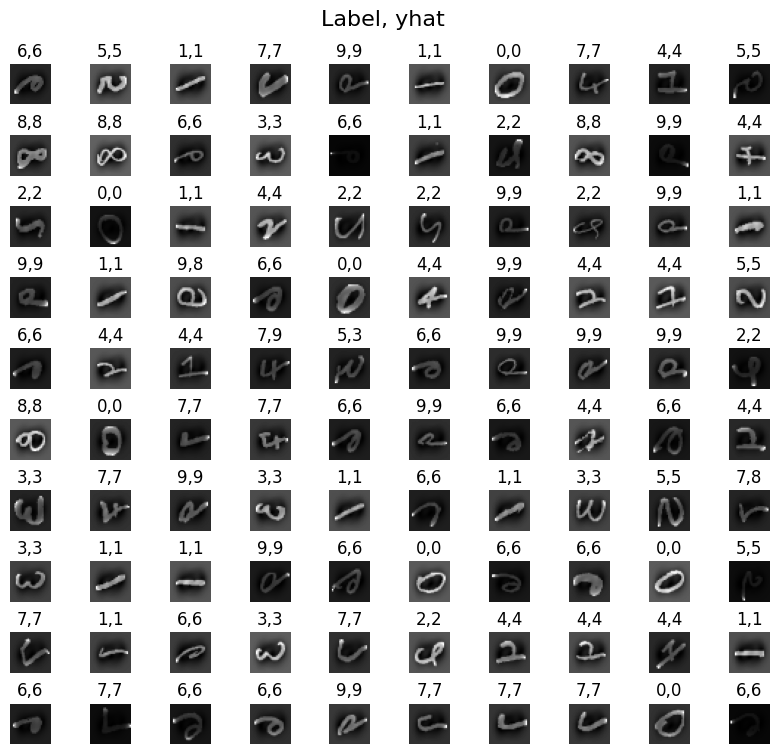

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_test_norm.shape[0],784


fig, axes = plt.subplots(10,10, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    
    X_random_reshaped = X_test_norm[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test_norm[random_index].reshape(1,28,28,1)).astype('float32')  
    predicted_class=np.argmax(prediction)
    # Display the label above the image
    ax.set_title(f"{Y_test[random_index]},{predicted_class}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()